# Feature Engineering

**1.load the data**

In [1]:
import pandas as pd
import numpy as np
df = pd.read_parquet("../data/curated/preprocessed_df.parquet")
df

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,payment_type,fare_amount,extra,tip_amount,airport_fee
0,2022-01-01 00:35:40,2022-01-01 00:53:29,3.80,142,1,14.5,3.0,3.65,0.0
1,2022-01-01 00:33:43,2022-01-01 00:42:07,2.10,236,1,8.0,0.5,4.00,0.0
2,2022-01-01 00:53:21,2022-01-01 01:02:19,0.97,166,1,7.5,0.5,1.76,0.0
3,2022-01-01 00:25:21,2022-01-01 00:35:23,1.09,114,2,8.0,0.5,0.00,0.0
6,2022-01-01 00:20:50,2022-01-01 00:34:58,5.07,233,1,17.0,0.5,5.20,0.0
...,...,...,...,...,...,...,...,...,...
8953423,2022-03-31 23:55:15,2022-03-31 23:59:55,0.80,230,1,5.0,0.5,1.76,0.0
8953425,2022-03-31 23:06:29,2022-03-31 23:28:41,4.60,113,2,18.0,3.0,0.00,0.0
8953426,2022-03-31 23:33:04,2022-03-31 23:42:18,1.90,238,1,9.0,0.5,0.00,0.0
8953427,2022-03-31 23:03:08,2022-03-31 23:19:32,3.96,148,1,14.5,0.5,3.66,0.0


**2.Feature engineering**

In [2]:
# time of the day and day of week could be a useful feature for analysing
df['time_of_day'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.weekday+1
df

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,payment_type,fare_amount,extra,tip_amount,airport_fee,time_of_day,day_of_week
0,2022-01-01 00:35:40,2022-01-01 00:53:29,3.80,142,1,14.5,3.0,3.65,0.0,0,6
1,2022-01-01 00:33:43,2022-01-01 00:42:07,2.10,236,1,8.0,0.5,4.00,0.0,0,6
2,2022-01-01 00:53:21,2022-01-01 01:02:19,0.97,166,1,7.5,0.5,1.76,0.0,0,6
3,2022-01-01 00:25:21,2022-01-01 00:35:23,1.09,114,2,8.0,0.5,0.00,0.0,0,6
6,2022-01-01 00:20:50,2022-01-01 00:34:58,5.07,233,1,17.0,0.5,5.20,0.0,0,6
...,...,...,...,...,...,...,...,...,...,...,...
8953423,2022-03-31 23:55:15,2022-03-31 23:59:55,0.80,230,1,5.0,0.5,1.76,0.0,23,4
8953425,2022-03-31 23:06:29,2022-03-31 23:28:41,4.60,113,2,18.0,3.0,0.00,0.0,23,4
8953426,2022-03-31 23:33:04,2022-03-31 23:42:18,1.90,238,1,9.0,0.5,0.00,0.0,23,4
8953427,2022-03-31 23:03:08,2022-03-31 23:19:32,3.96,148,1,14.5,0.5,3.66,0.0,23,4


In [3]:
# get the duration for the trip for future use
df['duration(min)'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']).astype('timedelta64[s]')/60
df['duration(min)'] = df['duration(min)'].round(3)
df


,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,payment_type,fare_amount,extra,tip_amount,airport_fee,time_of_day,day_of_week,duration(min)
0,2022-01-01 00:35:40,2022-01-01 00:53:29,3.80,142,1,14.5,3.0,3.65,0.0,0,6,17.817
1,2022-01-01 00:33:43,2022-01-01 00:42:07,2.10,236,1,8.0,0.5,4.00,0.0,0,6,8.400
2,2022-01-01 00:53:21,2022-01-01 01:02:19,0.97,166,1,7.5,0.5,1.76,0.0,0,6,8.967
3,2022-01-01 00:25:21,2022-01-01 00:35:23,1.09,114,2,8.0,0.5,0.00,0.0,0,6,10.033
6,2022-01-01 00:20:50,2022-01-01 00:34:58,5.07,233,1,17.0,0.5,5.20,0.0,0,6,14.133
...,...,...,...,...,...,...,...,...,...,...,...,...
8953423,2022-03-31 23:55:15,2022-03-31 23:59:55,0.80,230,1,5.0,0.5,1.76,0.0,23,4,4.667
8953425,2022-03-31 23:06:29,2022-03-31 23:28:41,4.60,113,2,18.0,3.0,0.00,0.0,23,4,22.200
8953426,2022-03-31 23:33:04,2022-03-31 23:42:18,1.90,238,1,9.0,0.5,0.00,0.0,23,4,9.233
8953427,2022-03-31 23:03:08,2022-03-31 23:19:32,3.96,148,1,14.5,0.5,3.66,0.0,23,4,16.400


In [4]:
df['duration(min)'].describe()

count    7.259164e+06
mean     1.210773e+01
std      4.331582e+01
min      1.700000e-02
25%      6.350000e+00
50%      9.767000e+00
75%      1.426700e+01
max      5.753433e+03
Name: duration(min), dtype: float64

In [5]:
# as the google map, the time travel from one side of nyc to the farest side takes about 50 miniutes
# there for the duration >200 would be fair enough to drop
df = df[df['duration(min)'] < 200]
df.shape

(7252025, 12)

In [6]:
# Now I wanna predict the tips for cash paying by using the data from credit card
# firstly sum the other columns to get a total amout excluding the tip
# note that it is not seriously total payment because I drop some other payments
df['total_payment'] = df[['fare_amount','extra','airport_fee']].sum(axis=1)
df

/tmp/ipykernel_3671/3577321305.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_payment'] = df[['fare_amount','extra','airport_fee']].sum(axis=1)


,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,payment_type,fare_amount,extra,tip_amount,airport_fee,time_of_day,day_of_week,duration(min),total_payment
0,2022-01-01 00:35:40,2022-01-01 00:53:29,3.80,142,1,14.5,3.0,3.65,0.0,0,6,17.817,17.5
1,2022-01-01 00:33:43,2022-01-01 00:42:07,2.10,236,1,8.0,0.5,4.00,0.0,0,6,8.400,8.5
2,2022-01-01 00:53:21,2022-01-01 01:02:19,0.97,166,1,7.5,0.5,1.76,0.0,0,6,8.967,8.0
3,2022-01-01 00:25:21,2022-01-01 00:35:23,1.09,114,2,8.0,0.5,0.00,0.0,0,6,10.033,8.5
6,2022-01-01 00:20:50,2022-01-01 00:34:58,5.07,233,1,17.0,0.5,5.20,0.0,0,6,14.133,17.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8953423,2022-03-31 23:55:15,2022-03-31 23:59:55,0.80,230,1,5.0,0.5,1.76,0.0,23,4,4.667,5.5
8953425,2022-03-31 23:06:29,2022-03-31 23:28:41,4.60,113,2,18.0,3.0,0.00,0.0,23,4,22.200,21.0
8953426,2022-03-31 23:33:04,2022-03-31 23:42:18,1.90,238,1,9.0,0.5,0.00,0.0,23,4,9.233,9.5
8953427,2022-03-31 23:03:08,2022-03-31 23:19:32,3.96,148,1,14.5,0.5,3.66,0.0,23,4,16.400,15.0


In [7]:
# next we want the mean ratio of tip amout and total payment
sub_df = df.loc[df['payment_type'] == 1,['tip_amount','total_payment']]
sub_df['tip_ratio'] = sub_df['tip_amount']/sub_df['total_payment']
mean_tip_ratio = sub_df['tip_ratio'].mean()

# apply the mean ratio to the cash payment
df.loc[df['payment_type'] == 2,'tip_amount'] = df['total_payment'] * mean_tip_ratio
df['tip_amount'] = df['tip_amount'].round(2)
df

/tmp/ipykernel_3671/2650872317.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tip_amount'] = df['tip_amount'].round(2)


,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,payment_type,fare_amount,extra,tip_amount,airport_fee,time_of_day,day_of_week,duration(min),total_payment
0,2022-01-01 00:35:40,2022-01-01 00:53:29,3.80,142,1,14.5,3.0,3.65,0.0,0,6,17.817,17.5
1,2022-01-01 00:33:43,2022-01-01 00:42:07,2.10,236,1,8.0,0.5,4.00,0.0,0,6,8.400,8.5
2,2022-01-01 00:53:21,2022-01-01 01:02:19,0.97,166,1,7.5,0.5,1.76,0.0,0,6,8.967,8.0
3,2022-01-01 00:25:21,2022-01-01 00:35:23,1.09,114,2,8.0,0.5,2.06,0.0,0,6,10.033,8.5
6,2022-01-01 00:20:50,2022-01-01 00:34:58,5.07,233,1,17.0,0.5,5.20,0.0,0,6,14.133,17.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8953423,2022-03-31 23:55:15,2022-03-31 23:59:55,0.80,230,1,5.0,0.5,1.76,0.0,23,4,4.667,5.5
8953425,2022-03-31 23:06:29,2022-03-31 23:28:41,4.60,113,2,18.0,3.0,5.08,0.0,23,4,22.200,21.0
8953426,2022-03-31 23:33:04,2022-03-31 23:42:18,1.90,238,1,9.0,0.5,0.00,0.0,23,4,9.233,9.5
8953427,2022-03-31 23:03:08,2022-03-31 23:19:32,3.96,148,1,14.5,0.5,3.66,0.0,23,4,16.400,15.0


In [8]:
# now we can update the payment with the tips
df['total_payment'] = df['total_payment'] + df['tip_amount']
# and then we can drop all the other feature about the payment
df = df.iloc[:,[0,1,2,3,9,10,11,12]]
df.head()

/tmp/ipykernel_3671/1223737079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_payment'] = df['total_payment'] + df['tip_amount']


,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,time_of_day,day_of_week,duration(min),total_payment
0,2022-01-01 00:35:40,2022-01-01 00:53:29,3.80,142,0,6,17.817,21.15
1,2022-01-01 00:33:43,2022-01-01 00:42:07,2.10,236,0,6,8.400,12.50
2,2022-01-01 00:53:21,2022-01-01 01:02:19,0.97,166,0,6,8.967,9.76
3,2022-01-01 00:25:21,2022-01-01 00:35:23,1.09,114,0,6,10.033,10.56
6,2022-01-01 00:20:50,2022-01-01 00:34:58,5.07,233,0,6,14.133,22.70


In [9]:
# I want use earning efficiency (payment/time) for a tip to represent the
# earning rate for each singe tip
df.insert(0,"earning_efficiency",df['total_payment'] / df['duration(min)'])
df

,earning_efficiency,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,time_of_day,day_of_week,duration(min),total_payment
0,1.187069,2022-01-01 00:35:40,2022-01-01 00:53:29,3.80,142,0,6,17.817,21.15
1,1.488095,2022-01-01 00:33:43,2022-01-01 00:42:07,2.10,236,0,6,8.400,12.50
2,1.088435,2022-01-01 00:53:21,2022-01-01 01:02:19,0.97,166,0,6,8.967,9.76
3,1.052527,2022-01-01 00:25:21,2022-01-01 00:35:23,1.09,114,0,6,10.033,10.56
6,1.606170,2022-01-01 00:20:50,2022-01-01 00:34:58,5.07,233,0,6,14.133,22.70
...,...,...,...,...,...,...,...,...,...
8953423,1.555603,2022-03-31 23:55:15,2022-03-31 23:59:55,0.80,230,23,4,4.667,7.26
8953425,1.174775,2022-03-31 23:06:29,2022-03-31 23:28:41,4.60,113,23,4,22.200,26.08
8953426,1.028918,2022-03-31 23:33:04,2022-03-31 23:42:18,1.90,238,23,4,9.233,9.50
8953427,1.137805,2022-03-31 23:03:08,2022-03-31 23:19:32,3.96,148,23,4,16.400,18.66


In [10]:
df['earning_efficiency'].describe()

count    7.252025e+06
mean     1.405977e+00
std      3.768744e+00
min      2.631959e-02
25%      1.037232e+00
50%      1.225063e+00
75%      1.510000e+00
max      1.461176e+03
Name: earning_efficiency, dtype: float64

Text(0, 0.5, 'earning_efficiency')

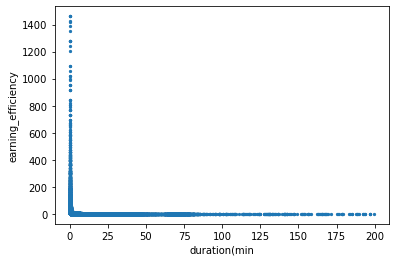

In [11]:
# The mean is about 1.68, but the max goes upto 1412!
# which may leads to huge bias!
import matplotlib.pyplot as plt
plt.scatter(df['duration(min)'],df['earning_efficiency'],s=5)
plt.xlabel('duration(min')
plt.ylabel('earning_efficiency')

Text(0, 0.5, 'earning_efficiency')

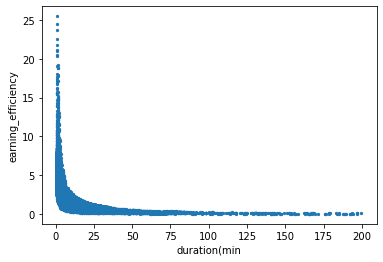

In [12]:
# by the graph, it is pretty clear that the extremly high earning rate is caused by
# the pretty some duration of a trip, therefore I decide to remove the trip that
# duration is less than 1 minute
df = df[df['duration(min)'] >= 1]
plt.scatter(df['duration(min)'],df['earning_efficiency'],s=5)
plt.xlabel('duration(min')
plt.ylabel('earning_efficiency')

**3.external dataset**

I decide to add the dataset of snowfall for each day for New York

http://www.cnyweather.com/wxsnowdetail.php?year=2022

there is no download link, so I grab the data and transformed it to
csv file, just put it in the data/raw file

In [13]:
# read data
snow = pd.read_csv("../data/raw/SnowFall2021-22.csv")
snow.head()

,Day,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Apr,May,Jun
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0,3.2,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.2,0.0,0.7,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.2,0.0,2.6,0.0,0.0,0.0,0.0


In [14]:
# get the wantted months in to the form we can merge
snow_jan = snow.iloc[:,[0,7]]
snow_feb = snow.iloc[:,[0,8]]
snow_mar = snow.iloc[:,[0,9]]

# feb only have 28 days for 2022
snow_feb = snow_feb.iloc[0:28,:]

# I want day and moth to be the merge key
snow_jan.insert(1, "Month",value = 1)
snow_feb.insert(1, "Month",value = 2)
snow_mar.insert(1, "Month",value = 3)

# rename the columns to concat
snow_jan.columns = ['Day','Month','snow_fall']
snow_feb.columns = ['Day','Month','snow_fall']
snow_mar.columns = ['Day','Month','snow_fall']

snow = pd.concat([snow_jan,snow_feb,snow_mar], axis = 0)
snow['snow_fall'] = snow['snow_fall'].astype(float)
snow

,Day,Month,snow_fall
0,1,1,0.0
1,2,1,0.0
2,3,1,0.8
3,4,1,0.0
4,5,1,0.0
...,...,...,...
26,27,3,0.4
27,28,3,1.0
28,29,3,0.2
29,30,3,0.0


In [ ]:
# save it for further use
snow.to_csv('../data/curated/snow.csv')

In [15]:
# we need our merge key for df too
df.insert(3, "Day",value = df['tpep_pickup_datetime'].dt.day)
df.insert(3, "Month",value = df['tpep_pickup_datetime'].dt.month)
df.head()

,earning_efficiency,tpep_pickup_datetime,tpep_dropoff_datetime,Month,Day,trip_distance,PULocationID,time_of_day,day_of_week,duration(min),total_payment
0,1.187069,2022-01-01 00:35:40,2022-01-01 00:53:29,1,1,3.80,142,0,6,17.817,21.15
1,1.488095,2022-01-01 00:33:43,2022-01-01 00:42:07,1,1,2.10,236,0,6,8.400,12.50
2,1.088435,2022-01-01 00:53:21,2022-01-01 01:02:19,1,1,0.97,166,0,6,8.967,9.76
3,1.052527,2022-01-01 00:25:21,2022-01-01 00:35:23,1,1,1.09,114,0,6,10.033,10.56
6,1.606170,2022-01-01 00:20:50,2022-01-01 00:34:58,1,1,5.07,233,0,6,14.133,22.70


In [16]:
# merge
df = pd.merge(df,snow, how='left',on=['Day','Month'])
df

,earning_efficiency,tpep_pickup_datetime,tpep_dropoff_datetime,Month,Day,trip_distance,PULocationID,time_of_day,day_of_week,duration(min),total_payment,snow_fall
0,1.187069,2022-01-01 00:35:40,2022-01-01 00:53:29,1,1,3.80,142,0,6,17.817,21.15,0.0
1,1.488095,2022-01-01 00:33:43,2022-01-01 00:42:07,1,1,2.10,236,0,6,8.400,12.50,0.0
2,1.088435,2022-01-01 00:53:21,2022-01-01 01:02:19,1,1,0.97,166,0,6,8.967,9.76,0.0
3,1.052527,2022-01-01 00:25:21,2022-01-01 00:35:23,1,1,1.09,114,0,6,10.033,10.56,0.0
4,1.606170,2022-01-01 00:20:50,2022-01-01 00:34:58,1,1,5.07,233,0,6,14.133,22.70,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7235809,1.555603,2022-03-31 23:55:15,2022-03-31 23:59:55,3,31,0.80,230,23,4,4.667,7.26,0.0
7235810,1.174775,2022-03-31 23:06:29,2022-03-31 23:28:41,3,31,4.60,113,23,4,22.200,26.08,0.0
7235811,1.028918,2022-03-31 23:33:04,2022-03-31 23:42:18,3,31,1.90,238,23,4,9.233,9.50,0.0
7235812,1.137805,2022-03-31 23:03:08,2022-03-31 23:19:32,3,31,3.96,148,23,4,16.400,18.66,0.0


In [17]:
# We've got all the feature we want, now we can drop the unneeded feature and save
df = df.iloc[:,[0,5,6,7,8,11]]
df

,earning_efficiency,trip_distance,PULocationID,time_of_day,day_of_week,snow_fall
0,1.187069,3.80,142,0,6,0.0
1,1.488095,2.10,236,0,6,0.0
2,1.088435,0.97,166,0,6,0.0
3,1.052527,1.09,114,0,6,0.0
4,1.606170,5.07,233,0,6,0.0
...,...,...,...,...,...,...
7235809,1.555603,0.80,230,23,4,0.0
7235810,1.174775,4.60,113,23,4,0.0
7235811,1.028918,1.90,238,23,4,0.0
7235812,1.137805,3.96,148,23,4,0.0


In [18]:
# save the data
df.to_parquet("../data/curated/result_df.parquet")